In [4]:
import numpy as np

pred = np.load('outputs/features/predicted_0.9172.npy')

In [2]:

# How many clusters?
print(len(np.unique(pred)))

38


In [3]:
# How many clusters?
print(np.sort(np.unique(pred)))

[ 0  1  2  3  4  5  7  8  9 10 11 12 17 18 21 22 23 24 25 27 28 30 32 33
 34 36 37 38 39 41 43 44 46 47 48 50 51 54]


In [ ]:
import pandas as pd

# Resultados MiniBatchKMeans

k_values = [20, 30, 40, 50, 60, 70, 80, 90, 130, 200, 210, 390]
ss_values = [0.15, 0.22, 0.20, 0.20, 0.21, 0.22, 0.23, 0.23, 0.28, 0.28, 0.30, 0.37]

ss_series = pd.Series(ss_values, index=k_values, name='ss')

ss_series.plot(marker='o')


In [3]:
df = pd.read_parquet('data/tce.parquet')

In [5]:
df['cluster'] = pred

In [14]:
len(df['cluster'])

1484918

In [13]:
most_frequent_clusters = df['cluster'].value_counts()
print("Most frequent clusters:")
print(most_frequent_clusters.iloc[:10])

print("\nLeast frequent clusters:")
print(most_frequent_clusters.iloc[-10:])


# most_frequents.plot(kind='bar')

Most frequent clusters:
cluster
8     106982
22     79011
7      72445
43     72352
50     69253
2      62379
10     61965
24     59592
0      58278
30     57773
Name: count, dtype: int64

Least frequent clusters:
cluster
48    25110
44    22413
25    16988
1     14211
38    13841
33     9768
47     5504
32      710
51      107
36       86
Name: count, dtype: int64


In [15]:
condition = df['Vlr_Empenhado'] < 0 # retirar do dataset os Vlr_Empenhados negativos, pois eles representam correções de empenhos antigos
data = df.drop(df[condition].index)

valor_empenhado = data[['Vlr_Empenhado','cluster']]

grupo_mean = valor_empenhado.groupby('cluster')['Vlr_Empenhado'].mean()
grupo_std = valor_empenhado.groupby('cluster')['Vlr_Empenhado'].std().fillna(0)

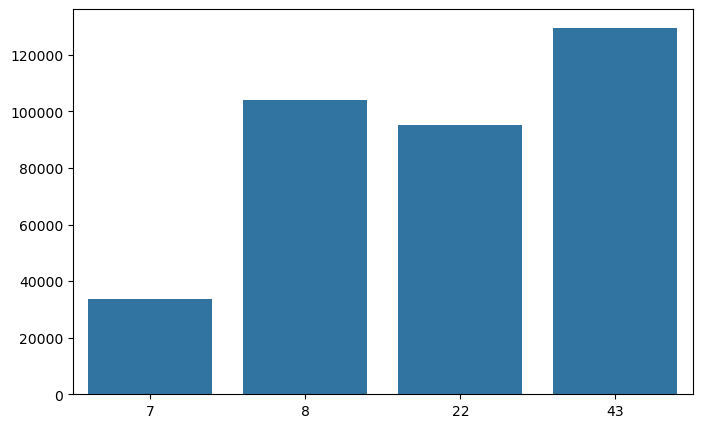

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_clusters = [8, 22, 7, 43]
plt.figure(figsize=(8, 5))
sns.barplot(x=selected_clusters, y=[grupo_mean[c] for c in selected_clusters])
plt.show()

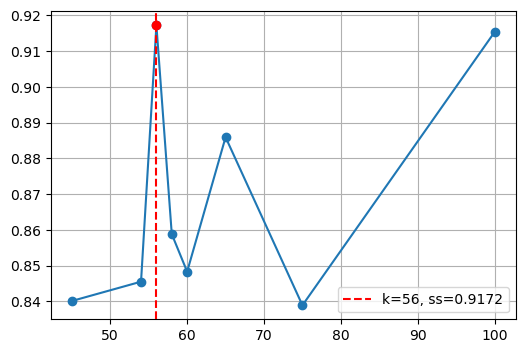

In [5]:
import matplotlib.pyplot as plt

k = [45, 54, 56, 58, 60, 65, 75, 100]
ss = [0.8401, 0.8455, 0.9172, 0.8588, 0.8483, 0.8859, 0.8389, 0.9153]

plt.figure(figsize=(6,4))
plt.plot(k, ss, marker='o')
plt.axvline(x=56, color='red', linestyle='--', zorder=5, label='k=56, ss=0.9172')
plt.scatter([56], [0.9172], color='red', zorder=6)
plt.legend()
# plt.xticks(list(k))
plt.grid(True)
plt.show()